In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Polynomial regression as linear least squares

From the knowledge of a sample of pair of scalar values $\{a_i, y_i\}_{i=1}^n$, we would like to predict the relation between $x$ and $y$. One simple way to go beyond linear regression is to consider polynomial regression: for example we could try to model $y$ as a polynomial of degree 3 of $a$. We would look for $(x_0, x_1, x_2, x_3) \in \mathbb{R}^4$ such that the values $a_i$ and $y_i$ are linked as $y_i \simeq x_0 + x_1 a_i + x_2 a_i^2$.

This problem can be mapped to linear regression by considering that we have for each $a$ a feature vectors of dimension $d + 1$ when considering the fit of a polynomial of degree $d$. This feature vector is $(1, a, a^2, \cdots, a^d)$. Such that the full data matrix is
$$
    A = \left[\begin{matrix}
    1 & a_1 & \cdots & a_1^d \\
    1 & a_2 & \cdots & a_2^d \\ 
    \vdots & \vdots & \vdots & \vdots \\
    1 & a_n & \cdots & a_n
\end{matrix} \right] \in \mathbb{R}^{n \times (d+1)}.
$$

As a exercise below we will consider data that was created from a polynomial of dimension 3, to which noise is added. Assuming that we do not know the degree of the generated polynomial, we will try to fit with $d = 5$ and $d=2$ and investigate ridge regression.  

In [75]:
## Helper functions to setup the problem
def get_data_mat(a, deg):
    """
    Inputs:
    a: (np.array of size N)
    deg: (int) max degree used to generate the data matrix
    
    Returns:
    A: (np.array of size N x (deg_true + 1)) data matrix
    """
    A = np.array([a ** i for i in range(deg + 1)]).T
    return A

def draw_sample(deg_true, x, N, eps=0):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    eps: noise level
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    a = np.sort(np.random.rand(N))
    A = get_data_mat(a, deg_true)
    y = A @ x + eps * np.random.randn(N)
    return a, y


**(a)** Complete the three functions below to obtain 
- the least square estimator $x^{LS}$
- the ridge estimator $x^{Ridge}$
- the mean square error $\lVert A x - y \rVert^2 / n$

In [76]:
def least_square_estimator(A, y):
    x_ls = np.linalg.inv((A.transpose()) @ A) @ (A.transpose()) @ y
    return np.array(x_ls)

def ridge_estimator(A, y, lbd):
    A_t = A.transpose()
    A_t_A = (A_t @ A)
    lbd_term = (lbd * np.identity(np.shape(A_t_A)[0]))
    x_ridge_inv = np.linalg.inv(A_t_A + lbd_term)
    x_ridge_2 = A_t @ y
    x_ridge = x_ridge_inv @ x_ridge_2
    return np.array(x_ridge)

def mean_squared_error(x, A, y):
    norm = (np.linalg.norm((A @ x) - y)) ** 2
    mse = norm / len(y)
    return mse

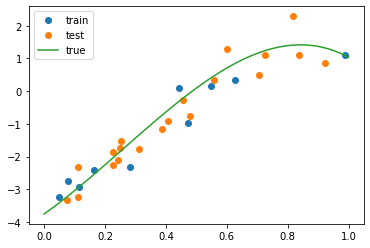

In [77]:
# This cells generates the data - for your submission do not change it. 
# But for your own curiosity, do not hesistate to investigate what is going on when changing the properties of the data :) 

np.random.seed(45) # fixing seed so everyone should see the same data
N = 10
deg_true = 3 # degree of true polynomial
eps = 0.5 # noise amplitude
x_true = np.array([-3.75307359,  6.58178662,  6.23070014, -8.02457871])

# radom input data
a_tr, y_tr = draw_sample(deg_true, x_true, N, eps=eps) # training data
a_te, y_te = draw_sample(deg_true, x_true, 2 * N, eps=eps) # testing data

a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')
plt.legend()

**(b)** Complete the code below to visualize the prediction of $x^{LS}$ and $x^{Ridge}$ for $\lambda$ in $[1e-7, 0.1, 1]$, using in all cases a prediction model of degree 5. The output of the cell should be a plot as above, where you added three lines of predictions for all values of $a \in [0,1]$: line LS, line ridge $\lambda = 1e-7$, line ridge $\lambda = 0.1$, line ridge $\lambda = 1$.

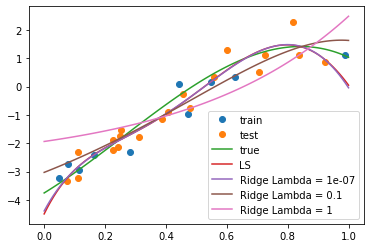

In [96]:
a_plot = np.linspace(0,1,100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')

deg_pred = 5

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = least_square_estimator(A_te, y_te)

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')

for lbd in [1e-7, 0.1, 1]:
   label = 'Ridge Lambda = ' + str(lbd)
   plt.plot(a_plot, A_plot @ ridge_estimator(A_te, y_te, lbd), label=label)
   pass
plt.legend()


**(c)** Use the `mean_squared_error` to make a plot of the training error and the test error as a function of $\lambda$ as we have seen in the lecture (range given below). Which value of $\lambda$ would you choose? Does that align with your intuition from the plots above?

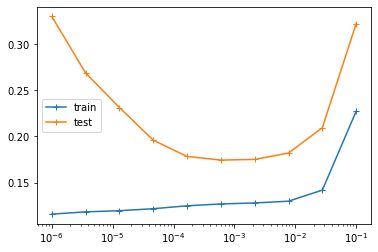

In [92]:
tr_mse = []
te_mse = []
lbds = np.logspace(-6, -1, 10)
for lbd in lbds:
    ridge_train = ridge_estimator(A_tr, y_tr, lbd)    
    tr_mse.append(mean_squared_error(ridge_train, A_tr, y_tr))
    te_mse.append(mean_squared_error(ridge_train, A_te, y_te))

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()

**(d)** For the optimal value of $\lambda$ compare $x^{LS}$, $x^{Ridge}$ and $x^{true}$.   


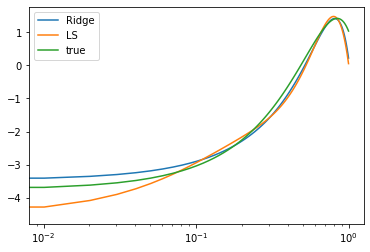

In [102]:
plt.plot(a_plot, A_plot @ ridge_estimator(A_te, y_te, 0.001), label='Ridge')
plt.plot(a_plot, A_plot @ x_ls, label='LS')
a_plot = np.linspace(0,1,100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_plot, A_plot @ x_true,'-', label='true')
plt.xscale('log')
plt.legend()

(e) Repeat the same operation with a fitting model of degree 2 (`deg_pred=2`). What are your findings related to the optimal degree of regularizations in this case? 

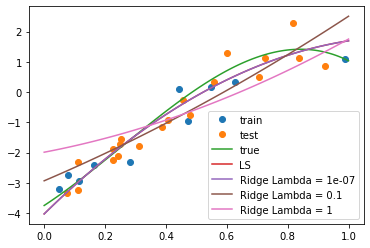

In [105]:
### PART B ###

a_plot = np.linspace(0,1,100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')

deg_pred = 2

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = least_square_estimator(A_te, y_te)

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')

for lbd in [1e-7, 0.1, 1]:
   label = 'Ridge Lambda = ' + str(lbd)
   plt.plot(a_plot, A_plot @ ridge_estimator(A_te, y_te, lbd), label=label)
   pass
plt.legend()

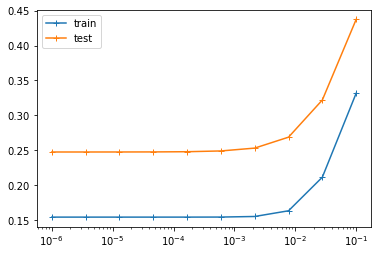

In [106]:
### PART C ###
tr_mse = []
te_mse = []
lbds = np.logspace(-6, -1, 10)
for lbd in lbds:
    ridge_train = ridge_estimator(A_tr, y_tr, lbd)    
    tr_mse.append(mean_squared_error(ridge_train, A_tr, y_tr))
    te_mse.append(mean_squared_error(ridge_train, A_te, y_te))

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()

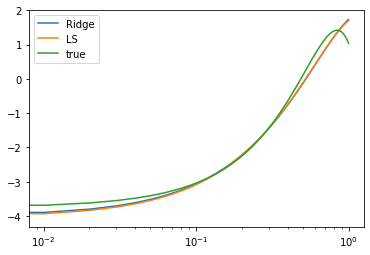

In [107]:
### PART D ###
plt.plot(a_plot, A_plot @ ridge_estimator(A_te, y_te, 0.001), label='Ridge')
plt.plot(a_plot, A_plot @ x_ls, label='LS')
a_plot = np.linspace(0,1,100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_plot, A_plot @ x_true,'-', label='true')
plt.xscale('log')
plt.legend()

It appears that the regularization term does not help quite as much in the case of an order two polynomial solution. The plot generated affirms the idea of choosing a regularization parameter with the smallest value. 